# **CityParks.csv**

I imported a csv file of the city park distribution throughout the city, imported the necessary data structures and assigned the values to a map seperating the different neighborhoods.

In [18]:
import pandas as pd
import numpy as np
import geopandas
import csv
import collections
import matplotlib
import matplotlib.pyplot as plt

#shp is shapefile
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")

## Parks Data Collection
By creating a new csv to reorganize the data, we are able to more easily read and plot the number of parks and their associated neighborhood.

                 Neighborhood  Number of Parks
0                East Liberty               12
1   Central Business District               10
2                   Beechview                8
3           South Side Slopes                7
4                Point Breeze                7
5            South Side Flats                6
6                   Hazelwood                6
7         Squirrel Hill South                6
8            Mount Washington                6
9                    Sheraden                6
10              South Oakland                5
11                  Troy Hill                5
12            Central Oakland                4
13           Brighton Heights                4
14                    Elliott                4


,Neighborhood,Number of Parks
0,East Liberty,12
1,Central Business District,10
2,Beechview,8
3,South Side Slopes,7
4,Point Breeze,7
...,...,...
69,New Homestead,1
70,West Oakland,1
71,Bluff,1
72,Middle Hill,1


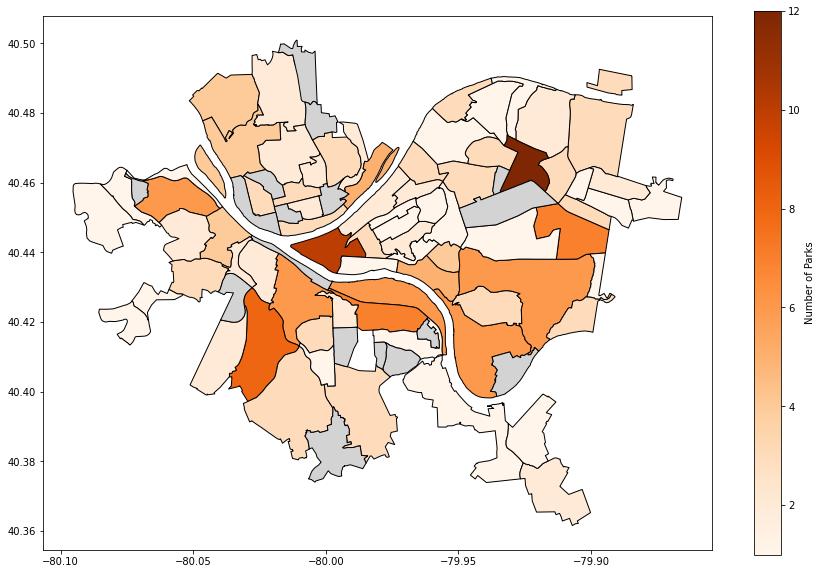

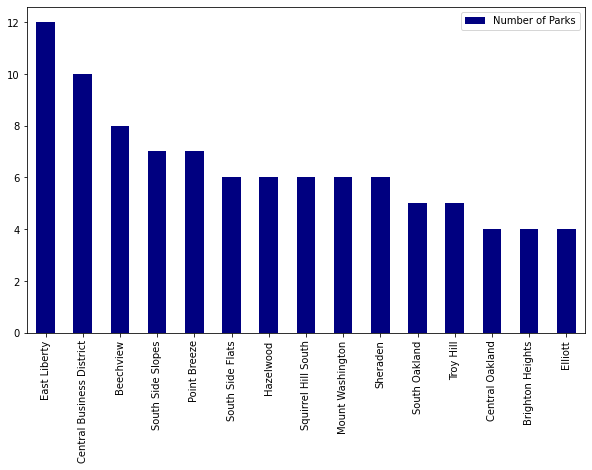

In [19]:
parks = collections.Counter()
with open('CityParks.csv') as file:
    for x in csv.reader(file, delimiter=','):
        parks[x[5]] += 1

df4 = pd.DataFrame(parks.most_common())
df4.columns=['Neighborhood', 'Number of Parks']
df4.groupby("Neighborhood").sum()['Number of Parks']

shaped4 = neighborhoods.merge(df4, how='left', left_on='hood', right_on='Neighborhood')

shaped4.plot(column='Number of Parks',
                    cmap='Oranges',
                    edgecolor="black",
                    legend=True,
                    legend_kwds={'label':"Number of Parks"},
                    figsize=(15,10),
                    missing_kwds={"color":"lightgrey"})

# .head() gets top values from DataFrame
topValues = df4.head(15)
print(topValues)
ax = topValues.plot(kind="bar", figsize=(10,6), colormap='gist_ncar')
ax.set_xticklabels(['East Liberty', 'Central Business District', 'Beechview', 'South Side Slopes', 'Point Breeze', 'South Side Flats', 'Hazelwood', 'Squirrel Hill South', 'Mount Washington', 'Sheraden', 'South Oakland', 'Troy Hill', 'Central Oakland', 'Brighton Heights', 'Elliott'])

# Display DataFrame as table
display(df4)

## Conclusion
As we can see here, the predominate neighborhoods containing city parks are East Liberty, Central Business District, and Beechview, however a great many of them contain multiple city parks giving a majority of them a boost in overal position in the running for best neighborhood.